# Import Library & Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
#take out warnings that are not that important
import warnings; warnings.simplefilter('ignore')

In [2]:
data = pd.read_csv('./DATA/application_train.csv')
desc_data = pd.read_csv('./DATA/HomeCredit_columns_description.csv', encoding='latin1')
data.shape

(307511, 122)

# Preprocessing

In [3]:
# Mengatur opsi untuk menampilkan semua baris dan kolom
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
desc_data

,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN
5,8,application_{train|test}.csv,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN
6,9,application_{train|test}.csv,CNT_CHILDREN,Number of children the client has,NaN
7,10,application_{train|test}.csv,AMT_INCOME_TOTAL,Income of the client,NaN
8,11,application_{train|test}.csv,AMT_CREDIT,Credit amount of the loan,NaN
9,12,application_{train|test}.csv,AMT_ANNUITY,Loan annuity,NaN


In [4]:
data.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [6]:
data.isna().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [7]:
#Proposi Missing Value pada setiap kolom dataset
null_val_sums = data.isnull().sum()
pd.DataFrame({"Column": null_val_sums.index, "Number of Null Values": null_val_sums.values,
             "Proportion": null_val_sums.values / len(data) })

,Column,Number of Null Values,Proportion
0,SK_ID_CURR,0,0.000000
1,TARGET,0,0.000000
2,NAME_CONTRACT_TYPE,0,0.000000
3,CODE_GENDER,0,0.000000
4,FLAG_OWN_CAR,0,0.000000
5,FLAG_OWN_REALTY,0,0.000000
6,CNT_CHILDREN,0,0.000000
7,AMT_INCOME_TOTAL,0,0.000000
8,AMT_CREDIT,0,0.000000
9,AMT_ANNUITY,12,0.000039


In [8]:
# Hapus baris dengan nilai yang hilang
data = data.dropna(axis=0)
data.shape

(8602, 122)

## EDA

Proporsi klien dengan kesulitan pembayaran : 0.06114857009997675


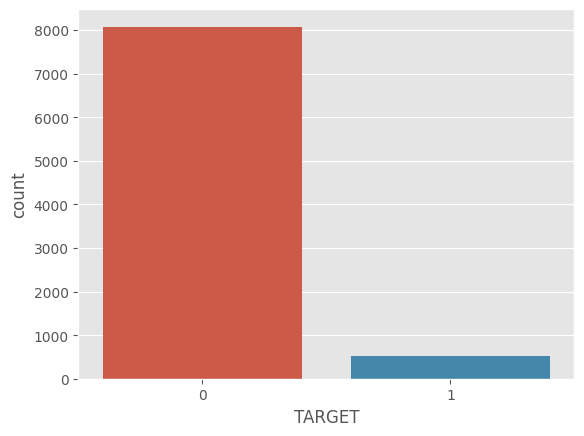

In [57]:
# Mengecek Keseimbangan Kelas Variabel Target
sns.countplot(x="TARGET", data=data)
print("Proporsi klien dengan kesulitan pembayaran : {}".format(data["TARGET"].sum() / len(data)))

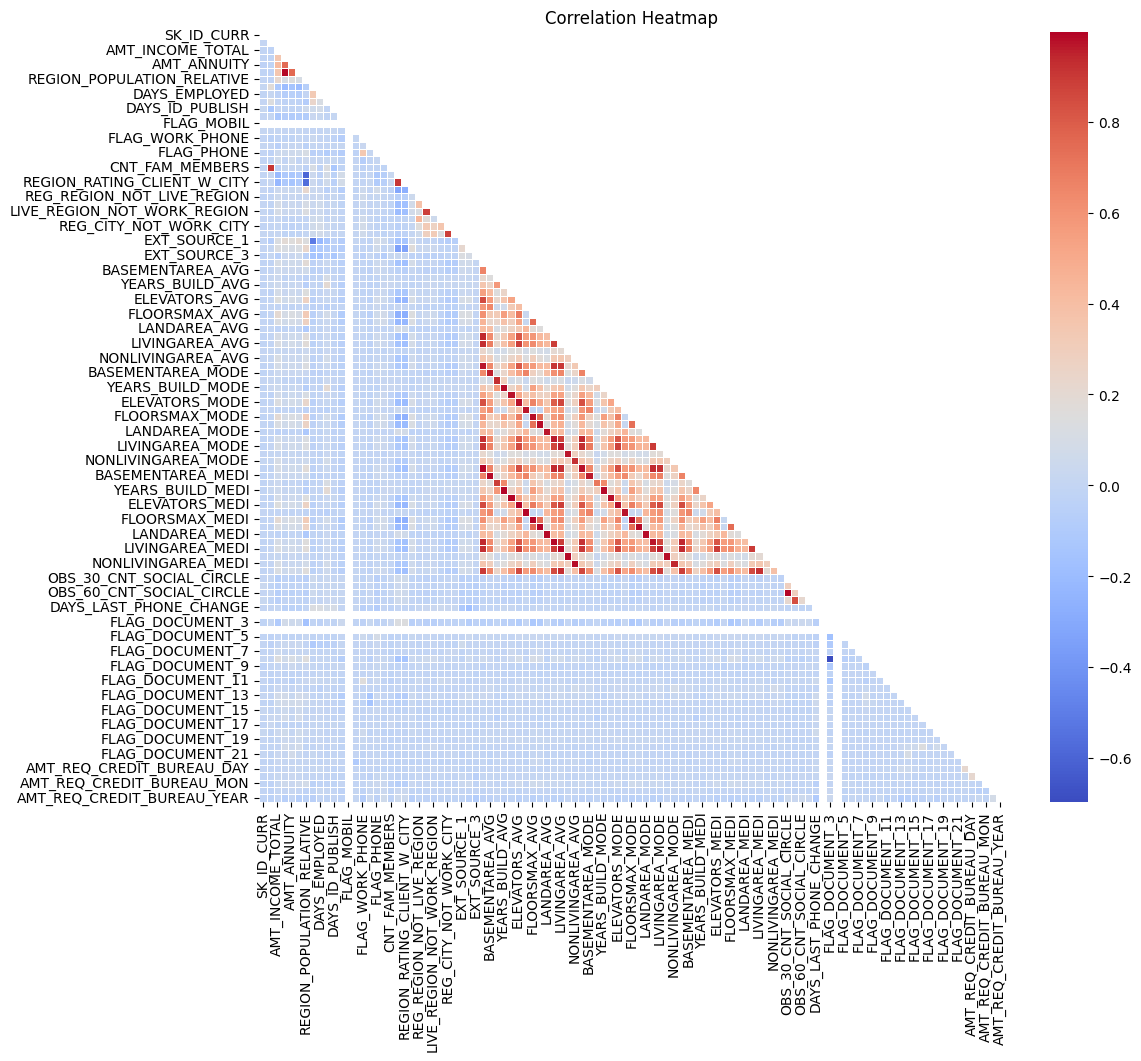

In [10]:
# Menghapus kolom 'TARGET'
df_no_target = data.drop('TARGET', axis=1)

# Menghitung matriks korelasi
corr_matrix = df_no_target.corr()

# Membuat matriks setengah persegi
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Membuat plot heat map setengah persegi
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, linewidths=0.5, mask=mask)
plt.title('Correlation Heatmap')
plt.show()

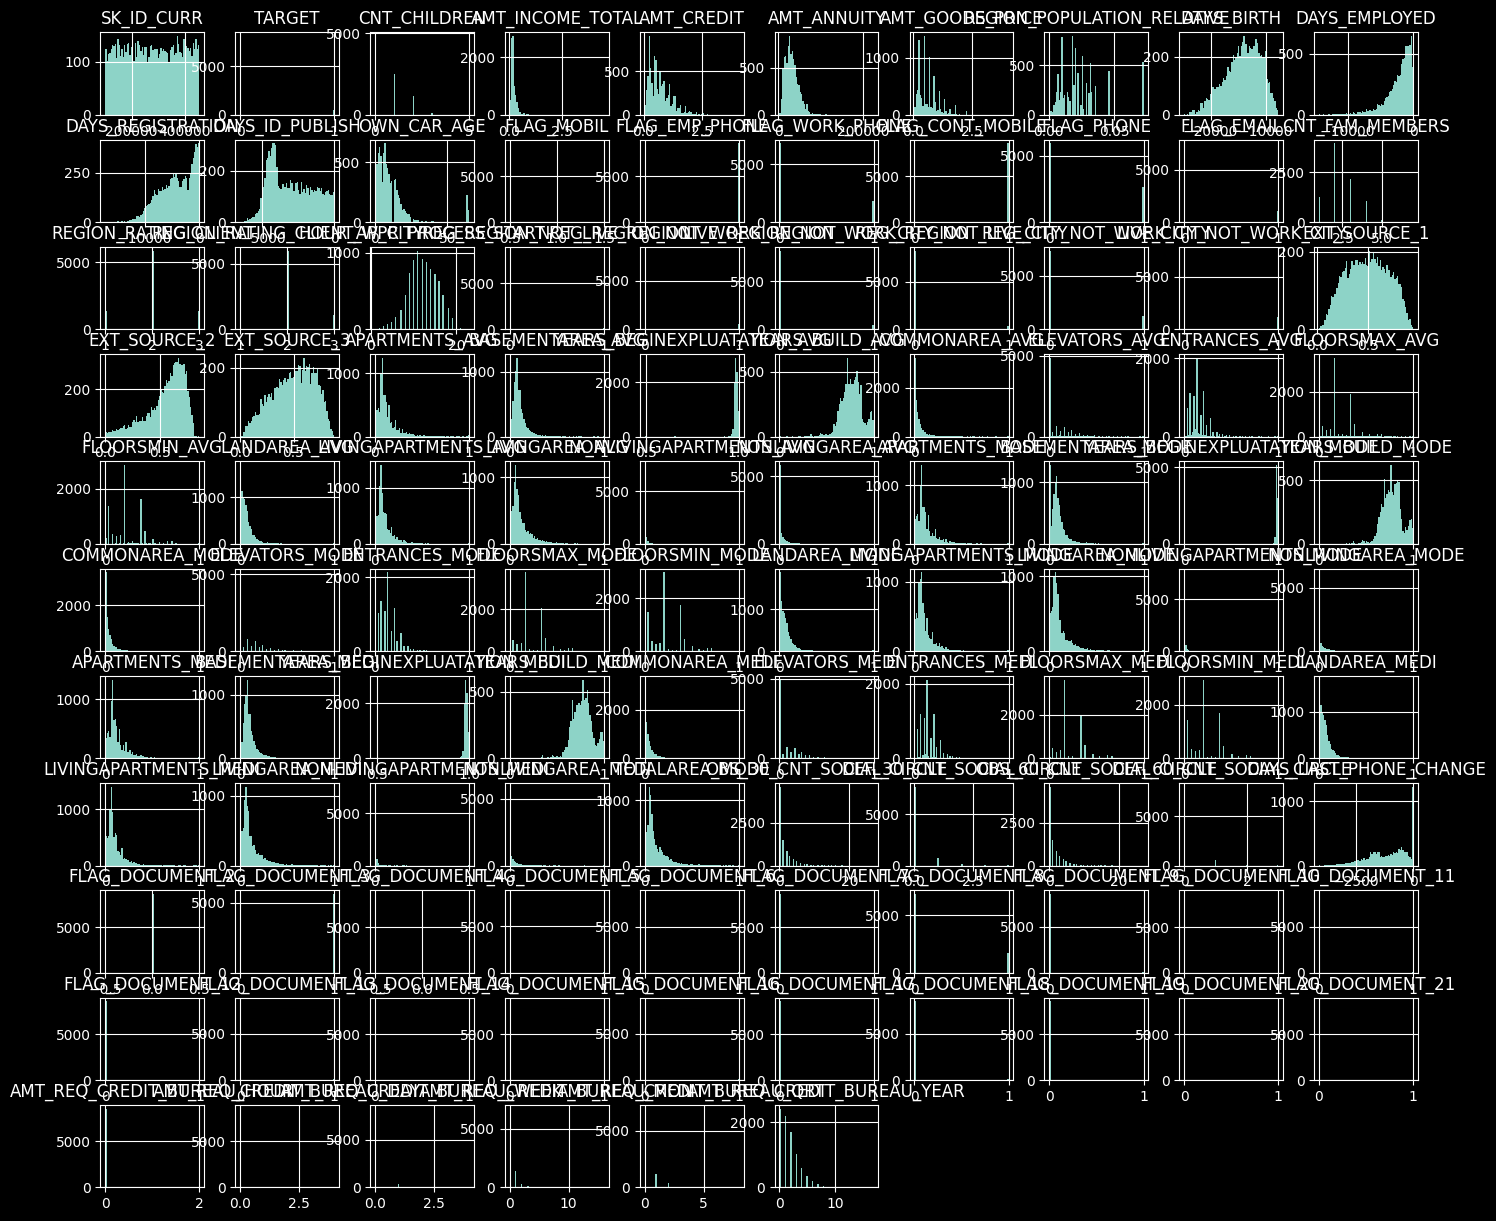

Text(0.5, 0.98, 'figure title')

<Figure size 640x480 with 0 Axes>

In [11]:
import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use(['dark_background'])
data.hist(bins = 70, figsize = (17,15))
plt.show()
plt.suptitle('figure title', color='w')

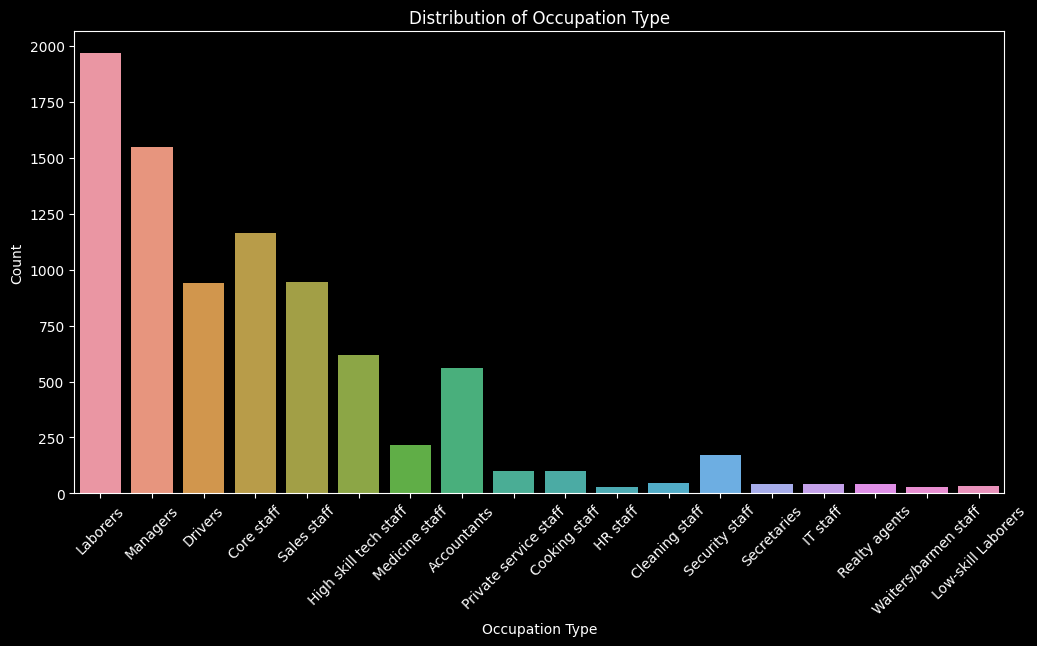

In [12]:
# Menampilkan distribusi pekerjaan
plt.figure(figsize=(12, 6))
sns.countplot(x='OCCUPATION_TYPE', data=data)
plt.xticks(rotation=45)
plt.xlabel('Occupation Type')
plt.ylabel('Count')
plt.title('Distribution of Occupation Type')
plt.show()

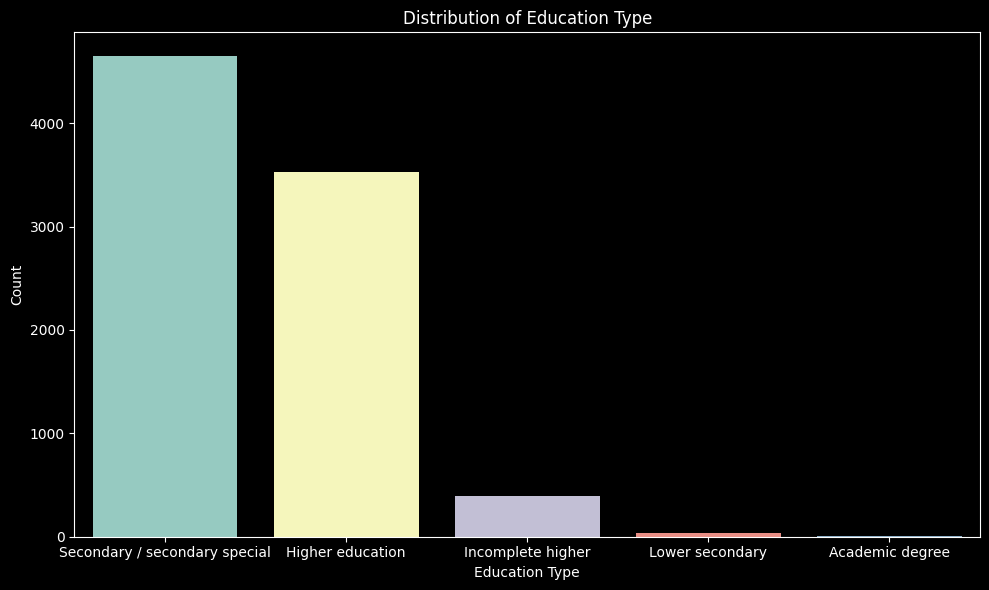

In [13]:
# Menampilkan distribusi pendidikan
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='NAME_EDUCATION_TYPE', data=data)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Education Type')
plt.ylabel('Count')
plt.title('Distribution of Education Type')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')

plt.tight_layout()
plt.show()

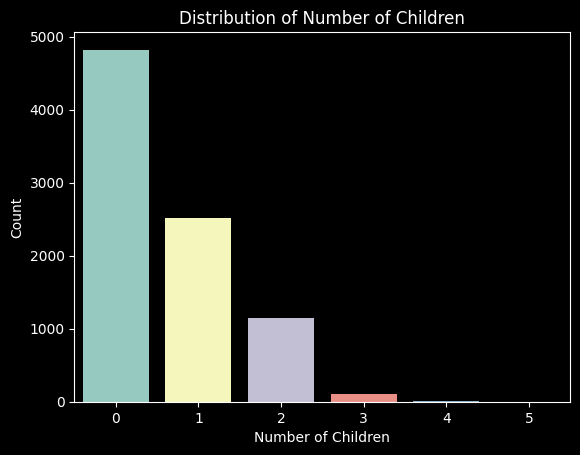

In [14]:
# Menampilkan distribusi jumlah anak
sns.countplot(x='CNT_CHILDREN', data=data)
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.title('Distribution of Number of Children')
plt.show()

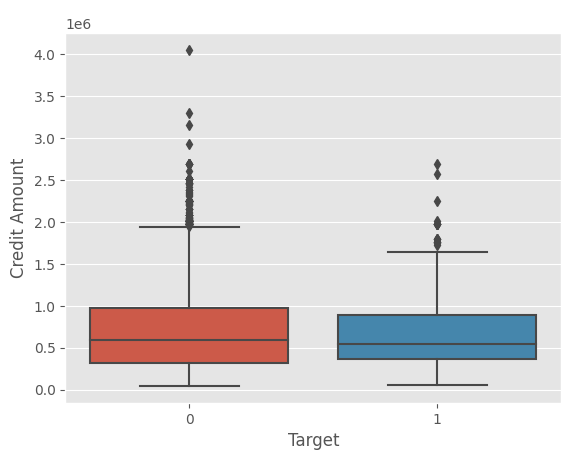

In [56]:
# Persebaran/distribusi banyak kredit berdasarkan target
plt.style.use('ggplot')
sns.boxplot(x='TARGET', y='AMT_CREDIT', data=data)
plt.xlabel('Target')
plt.ylabel('Credit Amount')
plt.title('Credit Amount by Target')
plt.show()

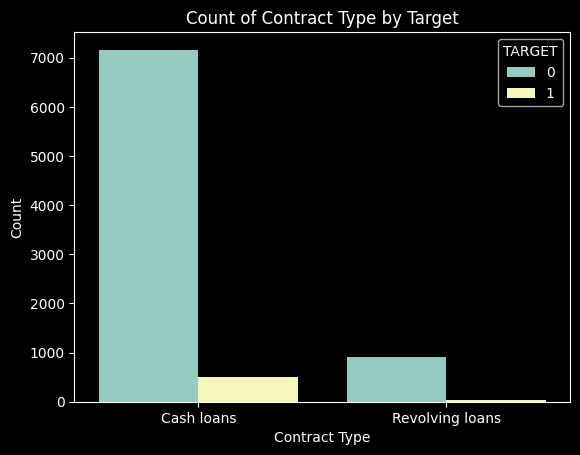

In [53]:
# Count plot
sns.countplot(x='NAME_CONTRACT_TYPE', hue='TARGET', data=data)
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.title('Count of Contract Type by Target')
plt.show()


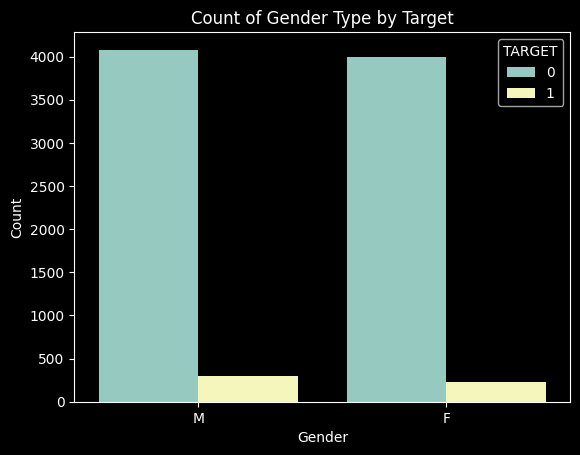

In [54]:
import seaborn as sns

sns.countplot(x='CODE_GENDER', hue='TARGET', data=data)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count of Gender Type by Target')
plt.show()

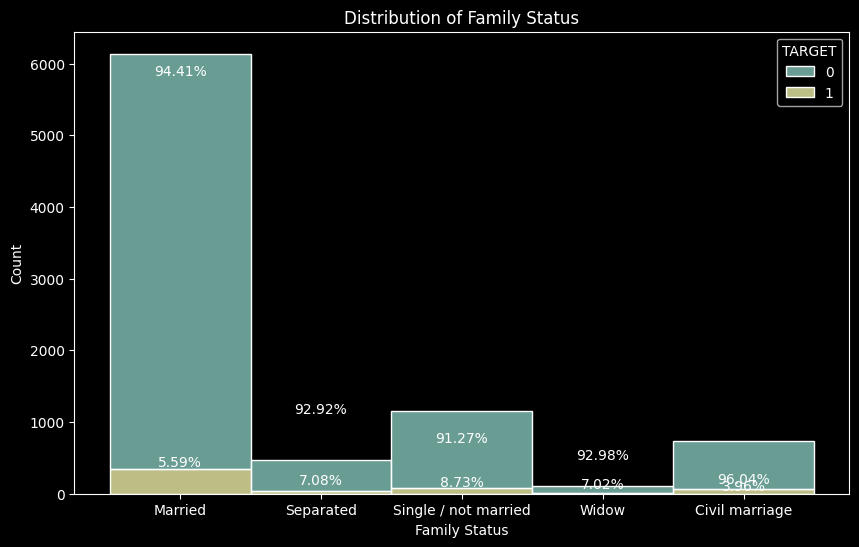

In [55]:
# Menampilkan distribusi status perkawinan
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='NAME_FAMILY_STATUS', hue='TARGET', multiple='stack')
plt.xlabel('Family Status')
plt.ylabel('Count')
plt.title('Distribution of Family Status')
total_counts = data['NAME_FAMILY_STATUS'].value_counts()
n_categories = len(total_counts)
for i, category in enumerate(total_counts.index):
    counts = data[data['NAME_FAMILY_STATUS'] == category]['TARGET'].value_counts()
    for j, count in enumerate(counts):
        percentage = count / total_counts[category] * 100
        plt.annotate(f'{percentage:.2f}%', xy=(i, count), ha='center', va='bottom')

plt.show()

## Feature Extraction 

In [19]:
# One-hot encoding
categorical_cols = ['NAME_CONTRACT_TYPE', 'OCCUPATION_TYPE', 'NAME_EDUCATION_TYPE']
df_encoded = pd.get_dummies(data, columns=categorical_cols)

In [20]:
from sklearn.preprocessing import LabelEncoder

# Label encoding
label_encoder = LabelEncoder()
df_encoded['GENDER_ENCODED'] = label_encoder.fit_transform(data['CODE_GENDER'])

In [21]:
from sklearn.preprocessing import StandardScaler

# Scaling
numerical_cols = ['AMT_INCOME_TOTAL', 'AMT_CREDIT']
scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

In [22]:
# Feature Engineering
df_encoded['EMPLOYMENT_TO_BIRTH'] = df_encoded['DAYS_EMPLOYED'] / df_encoded['DAYS_BIRTH']

In [23]:
# Menghitung korelasi antara fitur dengan target
correlations = df_encoded.corr()['TARGET'].sort_values()

# Mengambil fitur dengan korelasi tertinggi (positif atau negatif)
selected_features = correlations[correlations.abs() > 0.01].index.tolist()

# Subset dataframe dengan fitur yang terpilih
df_selected = df_encoded[selected_features]
print("Selected Features:")
print(selected_features)

Selected Features:
['EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1', 'EMPLOYMENT_TO_BIRTH', 'NAME_EDUCATION_TYPE_Higher education', 'FLOORSMAX_AVG', 'NAME_CONTRACT_TYPE_Revolving loans', 'FLOORSMAX_MODE', 'FLOORSMAX_MEDI', 'AMT_INCOME_TOTAL', 'OCCUPATION_TYPE_Core staff', 'FLOORSMIN_MEDI', 'FLOORSMIN_AVG', 'FLOORSMIN_MODE', 'TOTALAREA_MODE', 'OCCUPATION_TYPE_Accountants', 'LIVINGAPARTMENTS_AVG', 'APARTMENTS_AVG', 'FLAG_DOCUMENT_13', 'YEARS_BUILD_AVG', 'LIVINGAPARTMENTS_MEDI', 'APARTMENTS_MEDI', 'YEARS_BUILD_MEDI', 'ELEVATORS_AVG', 'LIVINGAREA_AVG', 'YEARS_BUILD_MODE', 'LIVINGAREA_MEDI', 'LIVINGAPARTMENTS_MODE', 'ELEVATORS_MEDI', 'LIVINGAREA_MODE', 'OCCUPATION_TYPE_Managers', 'CNT_FAM_MEMBERS', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'ELEVATORS_MODE', 'NONLIVINGAREA_MEDI', 'AMT_GOODS_PRICE', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_16', 'REGION_POPULATION_RELATIVE', 'CNT_CHILDREN', 'NONLIVINGAREA_MODE', 'BASEMENTAREA_AVG', 'BASEMENTAREA_MEDI', 'FLAG_PHONE', 'AMT_CREDIT', 'COMMONAREA_AVG', 'COMM

In [59]:
df_selected.shape

(8602, 91)

# Modelling

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from imblearn.over_sampling import SMOTE
# Memisahkan fitur dan target
X = df_selected.drop('TARGET', axis=1)
y = df_selected['TARGET']
# Melakukan oversampling dengan SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Menampilkan informasi kelas setelah oversampling
print("Jumlah kelas sebelum oversampling:")
print(y.value_counts())

print("Jumlah kelas setelah oversampling:")
print(y_resampled.value_counts())

Jumlah kelas sebelum oversampling:
0    8076
1     526
Name: TARGET, dtype: int64
Jumlah kelas setelah oversampling:
0    8076
1    8076
Name: TARGET, dtype: int64


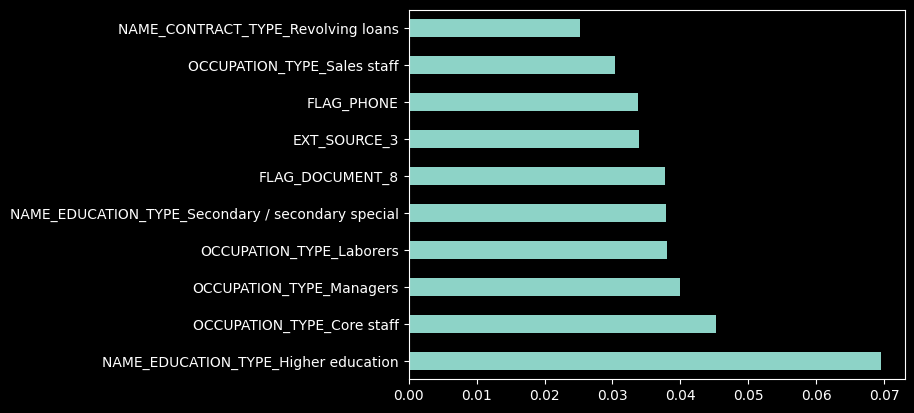

In [45]:
#feature importance
plt.style.use(['dark_background'])
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X_resampled,y_resampled)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [46]:
#LIST THE TOP 15 FEATURES
feat_importances.nlargest(15)

NAME_EDUCATION_TYPE_Higher education                 0.069550
OCCUPATION_TYPE_Core staff                           0.045226
OCCUPATION_TYPE_Managers                             0.040002
OCCUPATION_TYPE_Laborers                             0.037975
NAME_EDUCATION_TYPE_Secondary / secondary special    0.037918
FLAG_DOCUMENT_8                                      0.037682
EXT_SOURCE_3                                         0.033858
FLAG_PHONE                                           0.033792
OCCUPATION_TYPE_Sales staff                          0.030299
NAME_CONTRACT_TYPE_Revolving loans                   0.025249
OCCUPATION_TYPE_Drivers                              0.025004
FLAG_DOCUMENT_3                                      0.023777
OCCUPATION_TYPE_High skill tech staff                0.021542
OCCUPATION_TYPE_Accountants                          0.020352
EXT_SOURCE_1                                         0.020245
dtype: float64

In [47]:
# Memisahkan data menjadi data train dan data test
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=24)

## Penentuan Model

In [48]:
# Membuat pipeline untuk Decision Tree
pipeline_dt = Pipeline([
    ('classifier', DecisionTreeClassifier())
])

# Membuat pipeline untuk Random Forest
pipeline_rf = Pipeline([
    ('classifier', RandomForestClassifier(random_state=42))
])

# Membuat pipeline untuk Regresi Logistik
pipeline_lr = Pipeline([
    ('classifier', LogisticRegression())
])

# List pipeline dan nama algoritma
pipelines = [pipeline_dt, pipeline_rf, pipeline_lr]
pipeline_names = ['Decision Tree', 'Random Forest', 'Logistic Regression']

In [49]:
# Melakukan evaluasi menggunakan cross-validation
results = []
std = []
for pipeline, name in zip(pipelines, pipeline_names):
    kfold = KFold(n_splits=10, random_state=42, shuffle=True)
    cv_results = cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results.mean())
    std.append(cv_results.std())
    print("{0}: {1:.3f} (std: {2:.3f})".format(name, results[-1], std[-1]))

Decision Tree: 0.899 (std: 0.010)
Random Forest: 0.968 (std: 0.006)
Logistic Regression: 0.558 (std: 0.016)


### Validasi Model menggunakan Data Uji

### Regresi Logistic

Accuracy: 0.5506035283194057
              precision    recall  f1-score   support

           0       0.55      0.52      0.54      1613
           1       0.55      0.58      0.56      1618

    accuracy                           0.55      3231
   macro avg       0.55      0.55      0.55      3231
weighted avg       0.55      0.55      0.55      3231

AUC-ROC Score: 0.5801043284745313


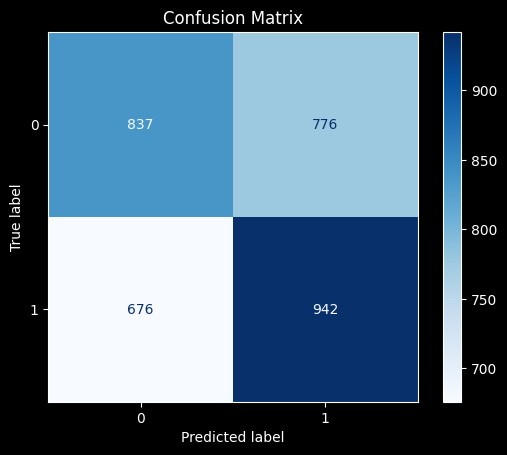

In [50]:
from sklearn.metrics import roc_auc_score
# Membangun model Regresi Logistik
model_lr = LogisticRegression()

# Melatih model
model_lr.fit(X_train, y_train)

# Memprediksi data uji
y_pred_lr = model_lr.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred_lr)
print(f'Accuracy: {accuracy}')
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)
print(classification_report(y_test, y_pred_lr))
# Melakukan prediksi probabilitas pada testing set
y_pred_proba = model_lr.predict_proba(X_test)[:, 1]
# Menghitung nilai AUC-ROC
auc_roc = roc_auc_score(y_test, y_pred_proba)

# Menampilkan nilai AUC-ROC
print("AUC-ROC Score:", auc_roc)
# Plot the confusion matrix
labels = y.unique()  # Ganti dengan label kelas yang sesuai
plot_confusion_matrix(model_lr, X_test, y_test, display_labels=labels, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

### Random Forest 

Accuracy: 0.9681213246672856
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1613
           1       0.99      0.94      0.97      1618

    accuracy                           0.97      3231
   macro avg       0.97      0.97      0.97      3231
weighted avg       0.97      0.97      0.97      3231

AUC-ROC Score: 0.993647871856984


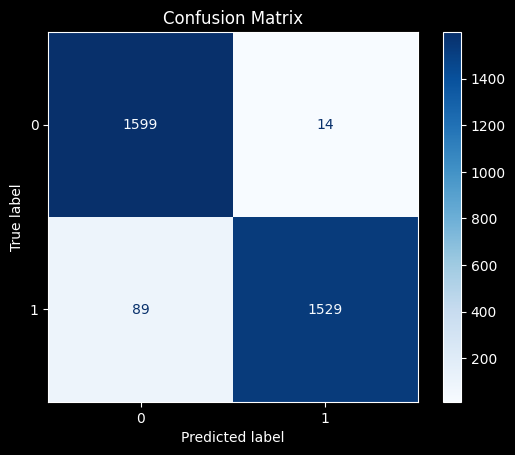

In [51]:
# Membangun model Random Forest
model_rf = RandomForestClassifier(random_state=42)

# Melatih model
model_rf.fit(X_train, y_train)

# Memprediksi data uji
y_pred_rf = model_rf.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy: {accuracy}')
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
print(classification_report(y_test, y_pred_rf))
# Melakukan prediksi probabilitas pada testing set
y_pred_proba = model_rf.predict_proba(X_test)[:, 1]
# Menghitung nilai AUC-ROC
auc_roc = roc_auc_score(y_test, y_pred_proba)

# Menampilkan nilai AUC-ROC
print("AUC-ROC Score:", auc_roc)
# Plot the confusion matrix
labels = y.unique()  # Ganti dengan label kelas yang sesuai
plot_confusion_matrix(model_rf, X_test, y_test, display_labels=labels, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


### Decision Tree 

Accuracy: 0.903435468895079
              precision    recall  f1-score   support

           0       0.92      0.88      0.90      1613
           1       0.89      0.92      0.91      1618

    accuracy                           0.90      3231
   macro avg       0.90      0.90      0.90      3231
weighted avg       0.90      0.90      0.90      3231

AUC-ROC Score: 0.9034036264375436


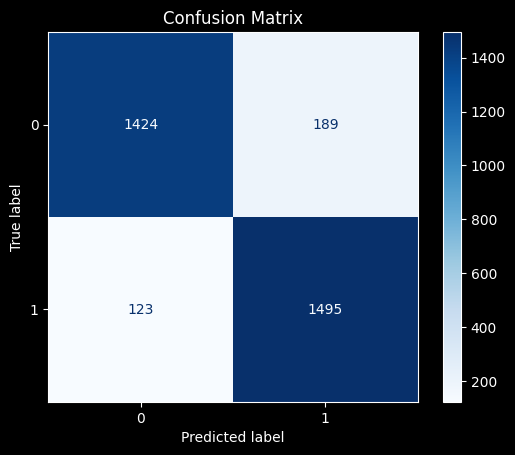

In [52]:
# Membangun model Decision Tree
model_dt = DecisionTreeClassifier()

# Melatih model
model_dt.fit(X_train, y_train)

# Memprediksi data uji
y_pred_dt = model_dt.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred_dt)
print(f'Accuracy: {accuracy}')
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)
print(classification_report(y_test, y_pred_dt))
# Melakukan prediksi probabilitas pada testing set
y_pred_proba = model_dt.predict_proba(X_test)[:, 1]
# Menghitung nilai AUC-ROC
auc_roc = roc_auc_score(y_test, y_pred_proba)

# Menampilkan nilai AUC-ROC
print("AUC-ROC Score:", auc_roc)
# Plot the confusion matrix
labels = y.unique()  # Ganti dengan label kelas yang sesuai
plot_confusion_matrix(model_dt, X_test, y_test, display_labels=labels, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()